In [1]:
import os
import cv2
import random
import numpy as np
from tensorflow import keras
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D,BatchNormalization,Dropout,Input,Activation
from keras.callbacks import ModelCheckpoint, TensorBoard ,EarlyStopping

In [4]:
datadir1=r"D:\AMIT_CONTENT\AMIT_CV\data\train"

In [5]:
datadir2=r"D:\AMIT_CONTENT\AMIT_CV\test"

In [6]:
catgories=["benign","malignant"]

In [34]:
training_data=[]
test_data=[]

In [35]:
for catgory in catgories:
    path1= os.path.join(datadir1,catgory)#D:\AMIT_CONTENT\AMIT_CV\data\train/cat
    class_num=catgories.index(catgory)
    for img in os.listdir(path1): #D:\AMIT_CONTENT\AMIT_CV\data\train/cat/0img...
        #[list have all content at folder bening then malignant 0jpg,1jpg,2jpg,... loop on names of all image inside folder]
        try:
            array_of_train_img=cv2.imread(os.path.join(path1,img))#[read image in folder using open cv merge (index 0jpg with image)]
            array_of_train_img=cv2.cvtColor(array_of_train_img, cv2.COLOR_BGR2GRAY)
            #resize image 
            training_data.append([array_of_train_img,class_num])
        except Exception as ex:
            pass
# try except to avoid any error   


for catgory in catgories:
    path2=os.path.join(datadir2,catgory)
    class_num=catgories.index(catgory)
    for img in os.listdir(path2):
        try:
            array_of_test_img=cv2.imread(os.path.join(path2,img))
            array_of_test_img=cv2.cvtColor(array_of_test_img,cv2.COLOR_BGR2GRAY)
            test_data.append([array_of_test_img,class_num])
        except Exception as ex:
            pass

In [36]:
random.shuffle(training_data)
random.shuffle(test_data)
#Shuffling the training data is a common technique used in machine learning to prevent the model from overfitting to the training data 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


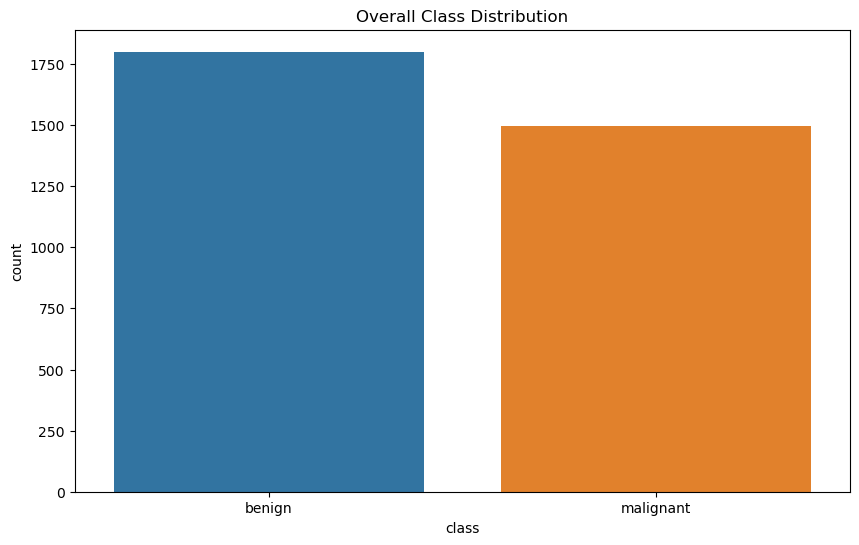

In [37]:
import seaborn as sns
import pandas as pd

# Define class names
class_names = ["benign","malignant"]

# Create DataFrames for training and test data
train_df = pd.DataFrame(training_data, columns=['image', 'class'])
test_df = pd.DataFrame(test_data, columns=['image', 'class'])

# Map class indices to class names
train_df['class'] = train_df['class'].map({i: class_names[i] for i in range(len(class_names))})
test_df['class'] = test_df['class'].map({i: class_names[i] for i in range(len(class_names))})

# Concatenate training and test data for overall visualization
data_df = pd.concat([train_df, test_df])

# Overall class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data_df)
plt.title('Overall Class Distribution')
plt.show()

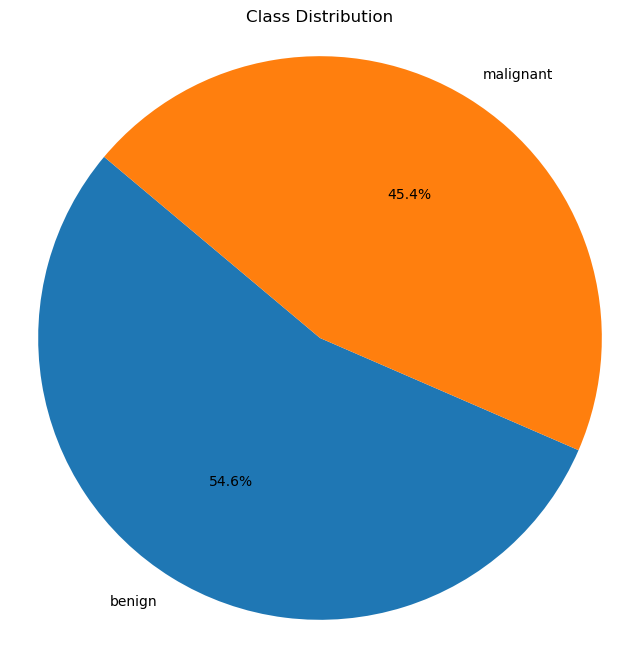

In [38]:
# Calculate class distribution
class_distribution = data_df['class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

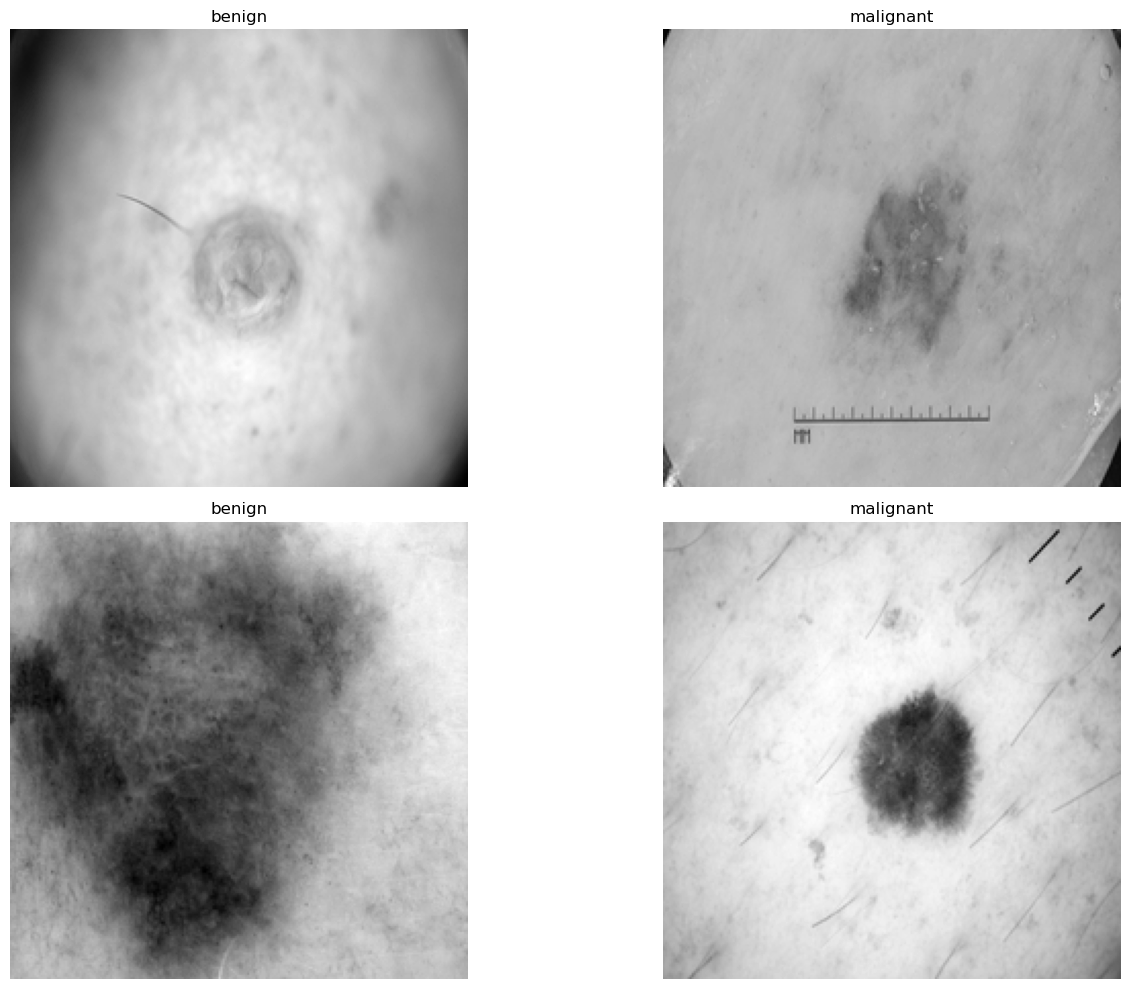

In [39]:
# Display sample images from each class
num_samples = 2  # Number of sample images to display 
class_names = ["benign","malignant"]

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    class_samples = data_df[data_df['class'] == class_name].sample(num_samples, random_state=42)
    
    for j, (image, _) in enumerate(class_samples.values):
        plt.subplot(num_samples, len(class_names), j * len(class_names) + i + 1)
        plt.imshow(image, cmap='gray')  # Assuming grayscale images
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [40]:
len(training_data)

2637

In [41]:
len(test_data)

660

In [42]:
#i=matrix_img
#j=index_labels
x=[]
y=[]
for i, j in training_data:
    x.append(i)
    y.append(j)

In [43]:
#i=matrix_img
#j=index_labels
x_test=[]
y_test=[]
for i, j in test_data:
    x_test.append(i)
    y_test.append(j)

In [44]:
x=np.array(x)
# convert list to array

In [45]:
x_test=np.array(x_test)

In [46]:
x=np.array(x).reshape(-1,224,224,1)
#-1 = all image in x resize it to 224,224,1
# 1 because we tranform to gray level have 1 channel

In [47]:
x_test=np.array(x_test).reshape(-1,224,224,1)
#-1 = all image in x resize it to 224,224,1
# 1 because we tranform to gray level have 1 channel

In [48]:
x.shape

(2637, 224, 224, 1)

In [49]:
x_test.shape

(660, 224, 224, 1)

In [50]:
y=np.array(y)

In [51]:
y_test=np.array(y_test)

In [52]:
y.shape

(2637,)

In [53]:
y_test.shape

(660,)

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [116]:
model=Sequential(name="my_model")

In [117]:
model.add(Conv2D(64,(3,3),padding='same',input_shape=x_train.shape[1:]))
#x.shape = size of image
#conv2d like dense in ann , same to make image the same size of original imahe valid mean we dont need image to be same size
#note model change filter values until reach filter with vaue give best accuracy and loss so it doesnt use specific accuracy
#we just use cnn to extrect important feature
# filter = 3*3 padding = filter-1 /2 = 3-1/2 =1 = one level of padding = 2 rows and 2 columns
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(16,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(3,3)))

model.add(Conv2D(8,(3,3),padding='same',activation='relu',strides=(1,1)))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [118]:
model.add(Flatten()) #convert to vector to build the classfication model 

In [119]:
#start classifcation 

model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [120]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 batch_normalization_23 (Ba  (None, 224, 224, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_23 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 112, 16)      25616     
                                                                 
 batch_normalization_24 (Ba  (None, 112, 112, 16)      64 

In [121]:
#from tensorflow.keras.utils import to_categorical

# Assuming `y` is your original label data (class1: 0, class2: 1)
#y_encoded = to_categorical(y, num_classes=2)

In [122]:
adam=keras.optimizers.Adam(learning_rate=0.001)

In [123]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
es= EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
# patience : after 5 epochs if val_loss doesnt improve stop

In [126]:
#sm=ModelCheckpoint(filepath='breast_cancer.h5',save_best_only=True,verbose=0)
 #save model with best ebochs accuracy

In [127]:
batch_size=4

In [128]:
    history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4,epochs=10,
                  steps_per_epoch=len(x_train)//batch_size
         ,shuffle=True,verbose=1,callbacks=[es]).history
#batch size number of train in each epoch
#epoch how many times the entire training dataset will be passed through the neural network during training.
#step per epoch calculated by dividing the total number of training examples by the batch size 2637/32

Epoch 1/30
461/461 [==============================] - 136s 292ms/step - loss: 0.7660 - accuracy: 0.5580 - val_loss: 0.6607 - val_accuracy: 0.6515
Epoch 2/30
461/461 [==============================] - 136s 295ms/step - loss: 0.6836 - accuracy: 0.5948 - val_loss: 1.2840 - val_accuracy: 0.4545
Epoch 3/30
461/461 [==============================] - 136s 296ms/step - loss: 0.6450 - accuracy: 0.6160 - val_loss: 0.6060 - val_accuracy: 0.6692
Epoch 4/30
461/461 [==============================] - 138s 300ms/step - loss: 0.6371 - accuracy: 0.6366 - val_loss: 0.7333 - val_accuracy: 0.5038
Epoch 5/30
461/461 [==============================] - 131s 283ms/step - loss: 0.6230 - accuracy: 0.6372 - val_loss: 0.6401 - val_accuracy: 0.5063
Epoch 6/30
461/461 [==============================] - 132s 286ms/step - loss: 0.6156 - accuracy: 0.6420 - val_loss: 0.8362 - val_accuracy: 0.5063
Epoch 7/30
461/461 [==============================] - 140s 305ms/step - loss: 0.6092 - accuracy: 0.6524 - val_loss: 0.5384 -

In [129]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 7s 346ms/step - loss: 0.5304 - accuracy: 0.7561


[0.5304467678070068, 0.7560606002807617]

In [63]:
skin_cancer_model=load_model("breast_cancer1.h5")

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [64]:
skin_cancer_model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_109 (Conv2D)             │ (None, 224, 224, 9)    │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_167         │ (None, 224, 224, 9)    │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_139 (Activation)     │ (None, 224, 224, 9)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_104               │ (None, 112, 223, 9)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 56, 112, 18)    │         4,068 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_168         │ (None, 56, 112, 18)    │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_140 (Activation)     │ (None, 56, 112, 18)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 27, 55, 18)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 25, 53, 18)     │         2,934 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_169         │ (None, 25, 53, 18)     │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_141 (Activation)     │ (None, 25, 53, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_106               │ (None, 24, 26, 18)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 11232)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 10)             │       112,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_170         │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_142 (Activation)     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,655 (467.41 KB)

 Trainable params: 119,543 (466.96 KB)

 Non-trainable params: 110 (440.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
y_prd=skin_cancer_model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [66]:
y_p=[]
for i in y_prd:
    if i >0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [67]:
list[y_p]

list[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1

In [77]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       360
           1       0.76      0.71      0.73       300

    accuracy                           0.77       660
   macro avg       0.76      0.76      0.76       660
weighted avg       0.76      0.77      0.76       660



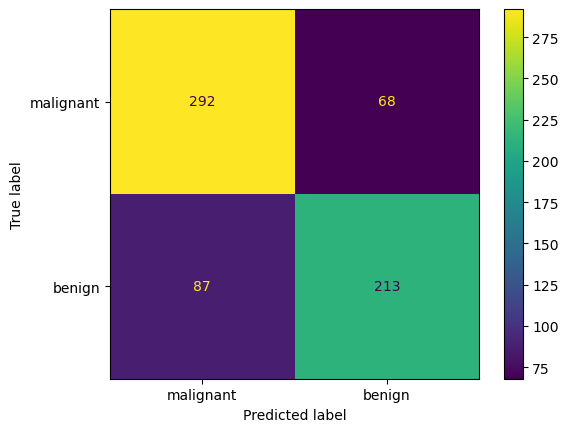

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt 
conf_matrix=confusion_matrix(y_test,y_p)
class_names = {"benign", "malignant"}
cm_display= ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
cm_display.plot()
plt.show()


In [68]:
class_names = {0: "benign", 1: "malignant"}

def classification_cancer(pred_image, threshold=0.5):
    pred_image = cv2.cvtColor(pred_image, cv2.COLOR_BGR2GRAY)
    pred_image = pred_image.reshape(-1, 224, 224, 1)
    prediction = skin_cancer_model.predict(pred_image)
    predicted_class = 1 if prediction > threshold else 0
    return class_names[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


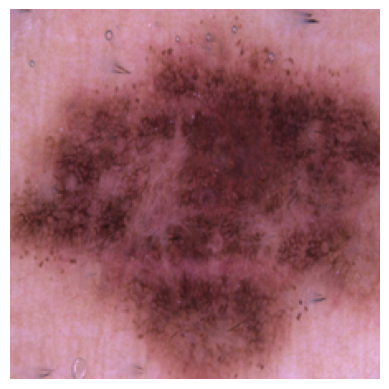

'malignant'

In [69]:
import matplotlib.pyplot as plt
image_predict=cv2.imread('773.jpg')
image_predict=classification_cancer(image_predict)
x=plt.imread('773.jpg')
plt.imshow(x)
plt.axis('off')
plt.show()
image_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


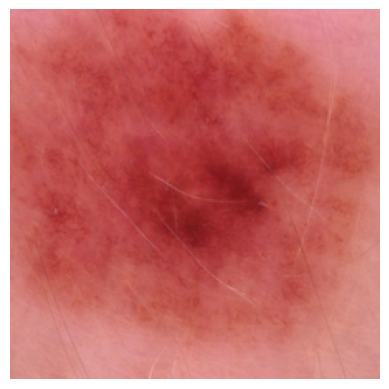

'benign'

In [71]:
import matplotlib.pyplot as plt
image_predict=cv2.imread('725.jpg')
image_predict=classification_cancer(image_predict)
x=plt.imread('725.jpg')
plt.imshow(x)
plt.axis('off')
plt.show()
image_predict